<a href="https://colab.research.google.com/github/madhura2024/myAI_MODELS/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Models

fetch

In [102]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)
# data.head(300)


clean

In [103]:
data=data.dropna(subset=["CustomerID"])
data['Description'] = data['Description'].fillna("Unknown")
data=data.dropna()

choose quantity greater than 0

In [104]:
sales=data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
sales['totalsales']=(sales['Quantity'] * sales['UnitPrice'])
# print("Total Sales Revenue:",totalsales)

/tmp/ipython-input-2715667667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['totalsales']=(sales['Quantity'] * sales['UnitPrice'])


now we are trying to find frequent customer / not  so for that we have to

*   set up threshold benchmark
*   compare and predict


In [105]:
threshold=1000
sales.loc[: , 'HighValue'] = np.where(sales['totalsales'] > threshold, 1, 0)
# if > 100 return 1 else return 0

/tmp/ipython-input-2629790871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.loc[: , 'HighValue'] = np.where(sales['totalsales'] > threshold, 1, 0)


choose input conditions and output to be found

In [106]:
x = sales[['Quantity', 'UnitPrice', 'totalsales']]
y = sales['HighValue']

train-test split

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=11)

implement logistic classifier

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("📌 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

📌 Logistic Regression
Accuracy: 0.9999874335549217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79509
           1       1.00      0.99      0.99        68

    accuracy                           1.00     79577
   macro avg       1.00      0.99      1.00     79577
weighted avg       1.00      1.00      1.00     79577



confusion matrix

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[79509     0]
 [    1    67]]


0.9999874335549217

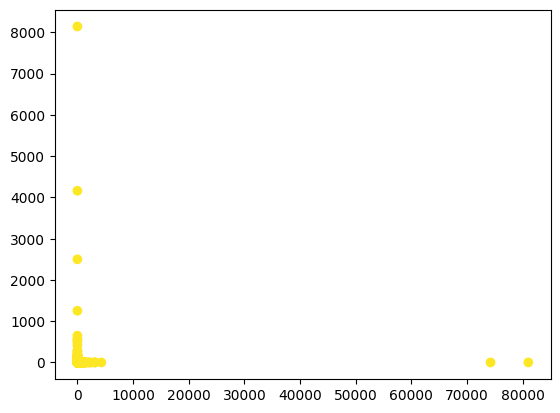

In [110]:
import matplotlib.pyplot as plt
plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()

randomforestclassifier

📌 RandomForestClassifier
Accuracy: 0.9999874335549217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79509
           1       1.00      0.99      0.99        68

    accuracy                           1.00     79577
   macro avg       1.00      0.99      1.00     79577
weighted avg       1.00      1.00      1.00     79577

[[79509     0]
 [    1    67]]


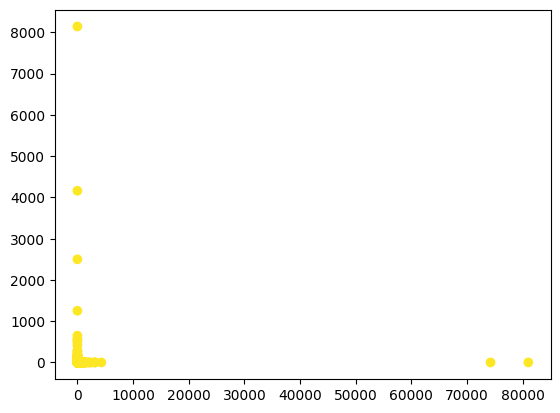

In [111]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("📌 RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()

In [112]:
samples = pd.DataFrame({
    'Quantity': [5, 50, 10, 2],
    'UnitPrice': [30, 30, 200, 400]
})

# Add totalsales column if your model was trained with it
samples['totalsales'] = samples['Quantity'] * samples['UnitPrice']

# Now predict
predictions = model.predict(samples)
print(predictions)


[0 1 1 0]




> decisiontreeclassifier


📌 DecisionTreeClassifier
Accuracy: 0.9999874335549217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79509
           1       1.00      0.99      0.99        68

    accuracy                           1.00     79577
   macro avg       1.00      0.99      1.00     79577
weighted avg       1.00      1.00      1.00     79577

[[79509     0]
 [    1    67]]


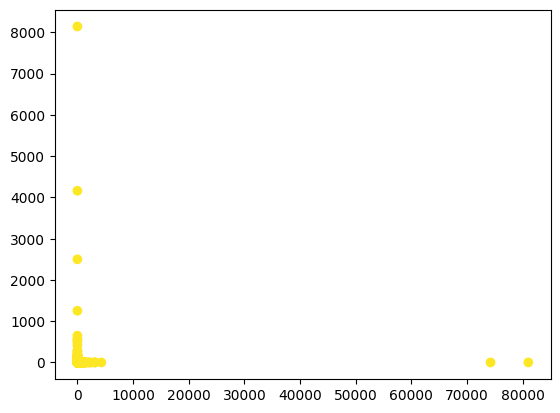

In [113]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("📌 DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()

knn

📌 KNeighborsClassifier
Accuracy: 0.9999874335549217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79509
           1       1.00      0.99      0.99        68

    accuracy                           1.00     79577
   macro avg       1.00      0.99      1.00     79577
weighted avg       1.00      1.00      1.00     79577

[[79509     0]
 [    1    67]]


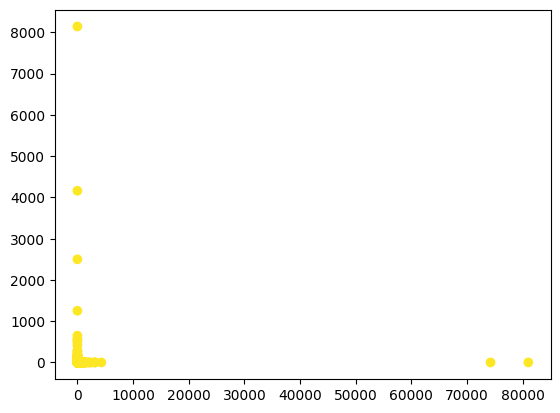

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("📌 KNeighborsClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()


naive bayes

📌 GaussianNB
Accuracy: 0.9916558804679744
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     79509
           1       0.09      1.00      0.17        68

    accuracy                           0.99     79577
   macro avg       0.55      1.00      0.58     79577
weighted avg       1.00      0.99      1.00     79577

[[78845   664]
 [    0    68]]


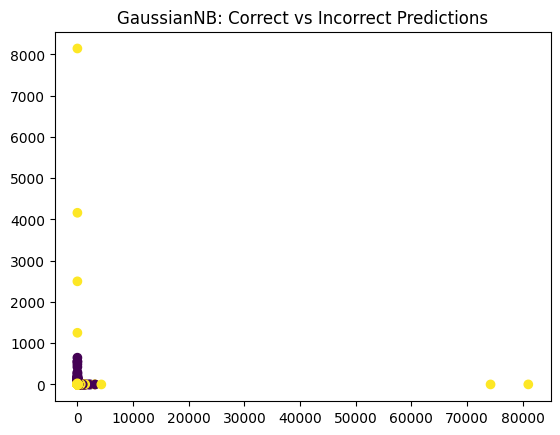

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("📌 GaussianNB")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.title("GaussianNB: Correct vs Incorrect Predictions")
plt.show()


now check for implementation what is my model taking as inputs?

In [116]:
print(x.columns)

Index(['Quantity', 'UnitPrice', 'totalsales'], dtype='object')


now pass value to check

In [117]:
samples = pd.DataFrame({
    'Quantity': [5, 50, 10, 2],
    'UnitPrice': [30, 30, 200, 400]
})

# Add totalsales column if your model was trained with it
samples['totalsales'] = samples['Quantity'] * samples['UnitPrice']

# Now predict
predictions = model.predict(samples)
print(predictions)


[0 1 1 1]
